# Desafio PySpark - Análise de dados do Spotify

No desafio proposto, foi fornecido um conjunto de dados relacionados ao Spotify, expostos em uma planilha estruturada contendo uma variedade significativa de informações passíveis de análise. O objetivo central do desafio consiste na realização de um processo ETL (Extração, Transformação e Carga) desses dados, utilizando preferencialmente as plataformas Google Colab ou Jupyter Notebook. Foi ressaltado a necessidade de compartilhar detalhadamente o procedimento adotado para o desafio.

Na execução do ETL, foi dada a tarefa de se apronfudar no módulo PySpark, módulo muito utilizado para extrair dados de maneira eficiente. Este módulo é utilizado para aplicar transformações pertinentes que aprimorem a qualidade e a utilidade das informações, e, por fim, temos que carregar os dados transformados de volta ao ambiente de análise. Foi observado para destacar de maneira clara os métodos utilizados para cada etapa do processo ETL, evidenciando as escolhas feitas e a lógica por trás delas.

Ao organizar os dados, foi expresso escolher de nossa preferência quanto à estruturação dos dados e a necessidade de justificar as escolhas, visando uma apresentação clara e compreensível. Para surpreender e agregar valor ao desafio, foi considerado a criação de uma dashboard utilizando alguma ferramenta da escolha do programador, destacando visualmente insights e padrões relevantes identificados nos dados.

Como requisito adicional, é solicitado que você finalize todo o processo até 10/12/2023, demonstrando comprometimento com o prazo estipulado.

Ao preparar o matérial para a apresentação, elaborei alguns tópicos para me manter organizado. 

1. **Valores do desenvolvimento**
   - Tendo em vista a possibilidade de se realizar um dashboard interativo de forma totalmente automatizada, há a necessidade de se pensar primeiro no foco em resultado. Não adianta de nada um dashboard bonito se ele pode quebrar com um simples erro. Então optei por utilizar uma abordagem mais simples, comecei desenvolvendo o código pensando na módulariedade, tornando a manutenção do software muito mais rápida e robusta.

2. **Configuração do projeto**
   - Tendo em vista ser um projeto simples focado em desenvolver habilidades na biblioteca PySpark, optei primeiro por configurar todo meu projeto em um único bloco de código para não atrapalhar nas exeções e testes que irão ser realizados.
   - Como forma de desenvolver um software robusto, utilizei de diversos exemplos e exercícios disponibilizados para servirem como um bom conteúdo de introdução geral.

2. **Dados a serem analisados**
   - A escolha dos dados analisados foi uma escolha própria onde optei por destacar os pontos mais importantes e avaliar de forma estatística. Outros dados que não tiveram tanta relevancia foram demonstrados os mótivos e destacados.
   - Para uma análise mais abrangente, foi explicado a relevância dos dados filtrados para a proposta.

3. **Quantos Dados?**
   - Os dados medidos foram relevantes para a análise, há um enorme conjunto de dados relacionados a artistas, músicas e outros tipos de dados que vamos abordar no nosso jupyter notebook.
   - Os dados serão apresentados utilizando métricas relevantes, como número de registros, variáveis analisadas, entre outras.

Ao seguir essas diretrizes, busquei surpreender pela excelência na execução técnica, clareza na comunicação e profundidade na análise realizada.


## Requisitos de projeto

Para inicializar alguns dos módulos do PySpark **é necessário ter o Java instalado** no seu computador. O PySpark é um framework que sua estrutura é dividida da seguinte forma:

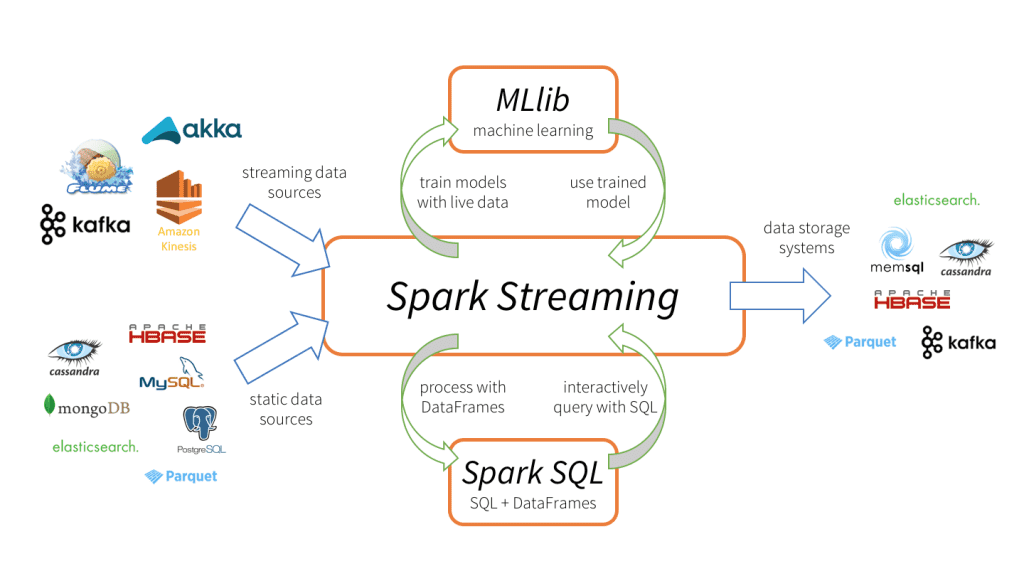

Como primeiro código vamos definir quais são os requisitos necessários pro nosso projeto.
Todas as importações necessárias que serão utilizadas durante o código vão ser inicializadas nesse primeiro bloco. Esse tipo de estruturação é essencial para se ter maior fluides na execução dos códigos. Poís se fosse necessário executar uma verificação de todas as bibliotecas necessárias durante o código, você vai perder um bom tempo. (Principalmente bibliotecas pesadas como Ultralytics ou OpenCV)

No entanto, para rodar a Dashboard com todas as funcionalidades já implementadas sem a necessidade de rodar todos os códigos desse notebook, foi criado uma arquivo .py no diretório.

Eu dividi o inicializador de requisitos de duas formas.

Quando você executar o bloco de códigos de requisitos, o código vai verificar se você está utilizando o google colab ou um jupyter notebook no seu computador local.
Esse tipo de definição é importante para se manter maior compatibilidade. Além disso há um arquivo chamado 'requirements.py', é um arquivo que vai instalar as bibliotecas necessárias caso você não tenha instalados no seu computador ou nuvem.

**Lembre-se de ativar a virtual env antes de rodar os códigos**

In [1]:
''' Setup environment para Google Colab ou localmente
    - Verificação de ambiente
    - Instalação de dependências
'''

try:
    import google.colab
    IN_COLAB = True
    from google.colab import drive
    drive.mount('/content/drive')
    !pip install -r requirements.txt
    print('-> Você está rodando no Google Colab')
except:
    IN_COLAB = False
    from requirements import check_and_install_requirements
    check_and_install_requirements() # Dependencies are installed env is ready to go
    print('-> Você está rodando localmente')

import pyspark
from IPython.display import clear_output
from pyspark.sql import SparkSession
import os

Missing libraries:  [('grpcio', '>=1.48, <1.57'), ('grpcio-status', '>=1.48, <1.57'), ('googleapis-common-protos', '==1.56.4'), ('hvplot', '>==0.9.0'), ('panel', '>=0.12.6')]
Installing missing libraries via pip...
Libraries installed successfully.
Missing libraries:  [('grpcio', '>=1.48, <1.57'), ('grpcio-status', '>=1.48, <1.57'), ('googleapis-common-protos', '==1.56.4'), ('hvplot', '>==0.9.0'), ('panel', '>=0.12.6')]
Installing missing libraries via pip...
Libraries installed successfully.
-> Você está rodando localmente


**Observe que há a necessidade da bibliteca estar com certas versões expecificas, você pode verificar na [documentação](https://spark.apache.org/docs/latest/api/python/getting_started/install.html?highlight=dependences)**

### Criação da sessão spark

O Apache Spark é um poderoso framework de processamento distribuído e análise de dados em larga escala. Ele oferece várias APIs para programação, incluindo em Scala, Java, **Python** e SQL. Uma SparkSession é a entrada principal e ponto de controle para qualquer funcionalidade Spark disponível em uma aplicação.

**Alguns comentários referêntes aos comandos de criação Spark:**

SparkSession.builder: Isso cria um construtor (Builder) para a configuração da SparkSession. O builder é responsável por especificar várias configurações para a sessão.

.appName("Spotify"): Define o nome da aplicação Spark. Isso é útil para identificar a aplicação em interfaces de monitoramento e ferramentas de gerenciamento do Spark.

.getOrCreate(): Este método tenta obter uma SparkSession existente ou cria uma nova se não existir. Isso é útil para garantir que, em um ambiente de execução distribuído, apenas uma SparkSession seja criada por aplicação.

Ao criar uma SparkSession, você está essencialmente configurando o ambiente para aproveitar as capacidades do Spark, como processamento distribuído de dados em RDDs (Resilient Distributed Datasets) ou DataFrames, execução otimizada de consultas SQL e suporte a bibliotecas como Spark SQL, MLlib (machine learning), GraphX (processamento de gráficos) e Spark Streaming (processamento de fluxo de dados).

A SparkSession encapsula a configuração do Spark e fornece um ponto central para interagir com todas as funcionalidades do Spark em uma aplicação.

In [2]:
spark = SparkSession.builder.appName("Spotify").getOrCreate()

## Códigos de desenvolvimento passo a passo

Como qualquer outra nova tecnologia que não temos conhecimento sobre, vamos pesquisar na [documentação](https://spark.apache.org/docs/latest/api/python/getting_started/index.html) do PySpark para entedermos o funcionamento do framework. Alguns dos arquivos que foram testes podem ser encontrados na pasta ***/notebooks***.

**Para seguirmos. vamos realizar os seguintes passos:**

1. Vamos começar definindo nosso diretório dos arquivos do projeto. 
2. Realizaremos a leitura do dataset disponibilizado.
3. Vamos analisar quais são os dados que podem ser relacionados.
4. Vamos realizar uma filtragem geral dos dados.
5. Vamos correlacionar os dados mais importantes que desejamos avaliar.
6. Vamos criar um dashboard interativo.

### 1. Configuração dos arquivos

In [3]:
if IN_COLAB == True:
    print('-> Você está rodando no Google Colab')
else:
    data = os.path.join(os.getcwd(), 'data//spotify.csv')
    print(data)

c:\Users\ProlRayder\Desktop\GitHub\SpotPySpark\data//spotify.csv


### 2. Visualização da tabela

In [4]:
df = spark.read.csv(data, header=True, inferSchema=True)
df.show(20)


quantidade_linhas = df.count()
quantidade_colunas = len(df.columns)
print('Quantidade de linhas: ', quantidade_linhas)
print('Quantidade de colunas: ', quantidade_colunas)

+----------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+
|Unnamed: 0|            track_id|             artists|          album_name|          track_name|popularity|duration_ms|explicit|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|time_signature|track_genre|
+----------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+
|         0|5SuOikwiRyPMVoIQD...|         Gen Hoshino|              Comedy|              Comedy|        73|     230666|   False|       0.676| 0.461|  1|  -6.746|   0|      0.143|      0.0322|         1.01E-6|   0.358|

Podemos visualizar também os dados utilizando a biblioteca pandas

In [16]:
import pandas as pd

pd.DataFrame(df.take(20), columns=df.columns)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,-6.746,0,0.143,0.0322,0.000001,0.358,0.715,87.917,4.0,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.42,0.166,...,-17.235,1,0.0763,0.924,0.000006,0.101,0.267,77.489,4.0,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,...,-9.734,1,0.0557,0.21,0.000000,0.117,0.12,76.332,4.0,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.905,0.000071,0.132,0.143,181.740,3.0,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.443,...,-9.681,1,0.0526,0.469,0.000000,0.0829,0.167,119.949,4.0,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.481,...,-8.807,1,0.105,0.289,0.000000,0.189,0.666,98.017,4.0,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.147,...,-8.822,1,0.0355,0.857,0.000003,0.0913,0.0765,141.284,3.0,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.444,...,-9.331,1,0.0417,0.559,0.000000,0.0973,0.712,150.960,4.0,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.414,...,-8.7,1,0.0369,0.294,0.000000,0.151,0.669,130.088,4.0,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.632,...,-6.77,1,0.0295,0.426,0.004190,0.0735,0.196,78.899,4.0,acoustic


#### Selecionando e acessando dados

Vamos acessar um indíce específico (linha/coluna) de uma propriedade da tabela 

In [17]:
# acessar apenas único indíce da coluna e linha
df.select('artists').collect()[0][0]

'Gen Hoshino'

In [35]:
# Acesse os valores da coluna
def get_column(df, column_name):
    return df.select(column_name).distinct().collect().show()

get_column = (input('Digite o nome da coluna: '))

In [32]:
# Acesse os valores da linha

def get_line(line):
    return df.take(int(line))[0]

get_line(input('Digite o nome da linha: '))

Row(Unnamed: 0=0, track_id='5SuOikwiRyPMVoIQDJUgSV', artists='Gen Hoshino', album_name='Comedy', track_name='Comedy', popularity='73', duration_ms='230666', explicit='False', danceability='0.676', energy='0.461', key='1', loudness='-6.746', mode='0', speechiness='0.143', acousticness='0.0322', instrumentalness=1.01e-06, liveness='0.358', valence='0.715', tempo=87.917, time_signature=4.0, track_genre='acoustic')

### 3. Análise dos dados relacionados

#### Podemos analisar as colunas pertencentes ao dataset

Então sabendo as colunas que temos disponíveis podemos separa-las de forma que possam ser úteis na hora de realizar a filtragem e a amostragem dos dados.

Observando as colunas e comparando com os resultados obtidos na tabela expressa, está evidente o significado de cada coluna com seus dados. Sabendo disso podemos realizar algum dos filtros como:

**Features:**
- Na dashboard vamos implementar uma função para descobrir a música mais tocada no ano escolhido, vamos filtrar o pela popularidade.
- Vamos realizar uma filtragem do tipo músical e ordenar todos os sons do artista.
- Vamos dividir alguns dados sobre a música sobre a populariedade da música para nós dar um dado que seja possível analisar quais são os ritmos menos ouvidos.


In [37]:
# Exemplo: Filtrar músicas com ordem de popularidade
def get_popularity(popularity):
    return df.filter(df.popularity > int(popularity)).show()

get_popularity(input('Digite a popularidade: '))

+----------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+
|Unnamed: 0|            track_id|             artists|          album_name|          track_name|popularity|duration_ms|explicit|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|time_signature|track_genre|
+----------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+
|         0|5SuOikwiRyPMVoIQD...|         Gen Hoshino|              Comedy|              Comedy|        73|     230666|   False|       0.676| 0.461|  1|  -6.746|   0|      0.143|      0.0322|         1.01E-6|   0.358|

In [39]:
def get_artists():
    return df.select('artists').distinct().show(20)

get_artists()

+--------------------+
|             artists|
+--------------------+
|Boyce Avenue;Mega...|
|    Ramshackle Glory|
|       Brendan James|
|      The Black Keys|
|    Jane's Addiction|
|  Mon Laferte;Juanes|
|        Yann Tiersen|
|  Fabrizio Paterlini|
|               Hugar|
|Anime Piano Dreamers|
|Yonder Mountain S...|
|South Austin Jug ...|
|B.B. King;John Mayer|
|   Don L;Flora Matos|
|Ed Solo;Skool Of ...|
|       Baobinga;I.D.|
|        Tang Siu Hau|
| Robert Owens;Atjazz|
|Gershon Jackson;R...|
|             Cri-Cri|
+--------------------+
only showing top 20 rows



In [41]:
# Exemplo: Populariedade das músicas do artista selecionado
import matplotlib.pyplot as plt
import numpy as np

def get_artist(artist):
    df_filtrado = df.filter(df.artists == artist).select('album_name', 'track_name', 'popularity')
    df_ordenado = df_filtrado.orderBy('popularity', ascending=False).show()

get_artist(input('Digite o nome do artista: '))

+-------------------+--------------------+----------+
|         album_name|          track_name|popularity|
+-------------------+--------------------+----------+
|  Indigo (Extended)| Under The Influence|        96|
|  Indigo (Extended)| Under The Influence|        96|
|Under The Influence|Under The Influen...|        77|
|Under The Influence|Under The Influen...|        77|
+-------------------+--------------------+----------+



In [43]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

def artist_songs(artist_name):
    df_filtrado = df.filter(col('artists') == artist_name)
    df_ordenado = df_filtrado.orderBy('popularity', ascending=False)
    df_ordenado.show(20)

artist_songs = input('Digite o nome do artista: ')


In [74]:
# Exemplo: Filtrar por genero
def track_genre():
    print('Gêneros disponíveis: ')
    genres = df.select("track_genre").distinct().orderBy(col("track_genre").asc()).collect()
    for genre_row in genres:
        print(genre_row["track_genre"])

    genre = input('Digite o gênero da música: ')

    if genre == 'exit': 
        return Menu.menu(df)
    else:
        clear_output()
        df_filtrado = df.filter(col('track_genre') == genre)
        df_filtrado.show(20)

track_genre()

+----------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+
|Unnamed: 0|            track_id|             artists|          album_name|          track_name|popularity|duration_ms|explicit|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|time_signature|track_genre|
+----------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+
|    110000|6f3Slt0GbA2bPZlz0...|              Tiësto|        The Business|        The Business|        82|     164000|   False|       0.798|  0.62|  8|  -7.079|   0|      0.232|       0.414|          0.0192|   0.112|

In [118]:
# Exemplo: Filtrar por track_genre e track_artist_name
 
df.filter((df.track_genre == 'sertanejo') & (df.artists == 'Jorge & Mateus')).show(20)

+----------+--------------------+--------------+--------------------+--------------------+----------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+
|Unnamed: 0|            track_id|       artists|          album_name|          track_name|popularity|duration_ms|explicit|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|time_signature|track_genre|
+----------+--------------------+--------------+--------------------+--------------------+----------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+
|     97333|6GkUCsN1tEH24jobK...|Jorge & Mateus|Jorge & Mateus Ao...|Do Brasil A Argen...|        49|     200000|   False|       0.443| 0.816|  7|  -5.475|   1|     0.0655|       0.209|             0.0|   0.962|  0.554|123.972|        

In [5]:
# Exemplo: Selecionar apenas colunas relevantes
df_selecionado = df.select("track_name", "artists", "popularity", "danceability")

In [6]:
df_selecionado.createOrReplaceGlobalTempView('tarefa')
query_result = spark.sql("SELECT * FROM global_temp.tarefa")
query_result.show(truncate=False)

Py4JJavaError: An error occurred while calling o38.createOrReplaceGlobalTempView.
: java.lang.RuntimeException: java.io.FileNotFoundException: java.io.FileNotFoundException: HADOOP_HOME and hadoop.home.dir are unset. -see https://wiki.apache.org/hadoop/WindowsProblems
	at org.apache.hadoop.util.Shell.getWinUtilsPath(Shell.java:735)
	at org.apache.hadoop.util.Shell.getSetPermissionCommand(Shell.java:270)
	at org.apache.hadoop.util.Shell.getSetPermissionCommand(Shell.java:286)
	at org.apache.hadoop.fs.RawLocalFileSystem.setPermission(RawLocalFileSystem.java:978)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkOneDirWithMode(RawLocalFileSystem.java:660)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirsWithOptionalPermission(RawLocalFileSystem.java:700)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirs(RawLocalFileSystem.java:672)
	at org.apache.hadoop.fs.ChecksumFileSystem.mkdirs(ChecksumFileSystem.java:788)
	at org.apache.spark.sql.catalyst.catalog.InMemoryCatalog.liftedTree1$1(InMemoryCatalog.scala:122)
	at org.apache.spark.sql.catalyst.catalog.InMemoryCatalog.createDatabase(InMemoryCatalog.scala:119)
	at org.apache.spark.sql.internal.SharedState.externalCatalog$lzycompute(SharedState.scala:159)
	at org.apache.spark.sql.internal.SharedState.externalCatalog(SharedState.scala:140)
	at org.apache.spark.sql.internal.SharedState.globalTempViewManager$lzycompute(SharedState.scala:176)
	at org.apache.spark.sql.internal.SharedState.globalTempViewManager(SharedState.scala:174)
	at org.apache.spark.sql.internal.BaseSessionStateBuilder.$anonfun$catalog$2(BaseSessionStateBuilder.scala:155)
	at org.apache.spark.sql.catalyst.catalog.SessionCatalog.globalTempViewManager$lzycompute(SessionCatalog.scala:123)
	at org.apache.spark.sql.catalyst.catalog.SessionCatalog.globalTempViewManager(SessionCatalog.scala:123)
	at org.apache.spark.sql.catalyst.catalog.SessionCatalog.getRawGlobalTempView(SessionCatalog.scala:689)
	at org.apache.spark.sql.execution.command.CreateViewCommand.$anonfun$run$4(views.scala:137)
	at org.apache.spark.sql.execution.command.ViewHelper$.createTemporaryViewRelation(views.scala:621)
	at org.apache.spark.sql.execution.command.CreateViewCommand.run(views.scala:141)
	at org.apache.spark.sql.execution.command.ExecutedCommandExec.sideEffectResult$lzycompute(commands.scala:75)
	at org.apache.spark.sql.execution.command.ExecutedCommandExec.sideEffectResult(commands.scala:73)
	at org.apache.spark.sql.execution.command.ExecutedCommandExec.executeCollect(commands.scala:84)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.$anonfun$applyOrElse$1(QueryExecution.scala:107)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:107)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:98)
	at org.apache.spark.sql.catalyst.trees.TreeNode.$anonfun$transformDownWithPruning$1(TreeNode.scala:461)
	at org.apache.spark.sql.catalyst.trees.CurrentOrigin$.withOrigin(origin.scala:76)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDownWithPruning(TreeNode.scala:461)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.org$apache$spark$sql$catalyst$plans$logical$AnalysisHelper$$super$transformDownWithPruning(LogicalPlan.scala:32)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning(AnalysisHelper.scala:267)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning$(AnalysisHelper.scala:263)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:32)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:32)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDown(TreeNode.scala:437)
	at org.apache.spark.sql.execution.QueryExecution.eagerlyExecuteCommands(QueryExecution.scala:98)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted$lzycompute(QueryExecution.scala:85)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted(QueryExecution.scala:83)
	at org.apache.spark.sql.Dataset.<init>(Dataset.scala:220)
	at org.apache.spark.sql.Dataset$.$anonfun$ofRows$1(Dataset.scala:92)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.Dataset$.ofRows(Dataset.scala:89)
	at org.apache.spark.sql.Dataset.withPlan(Dataset.scala:4363)
	at org.apache.spark.sql.Dataset.createOrReplaceGlobalTempView(Dataset.scala:3955)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Unknown Source)
Caused by: java.io.FileNotFoundException: java.io.FileNotFoundException: HADOOP_HOME and hadoop.home.dir are unset. -see https://wiki.apache.org/hadoop/WindowsProblems
	at org.apache.hadoop.util.Shell.fileNotFoundException(Shell.java:547)
	at org.apache.hadoop.util.Shell.getHadoopHomeDir(Shell.java:568)
	at org.apache.hadoop.util.Shell.getQualifiedBin(Shell.java:591)
	at org.apache.hadoop.util.Shell.<clinit>(Shell.java:688)
	at org.apache.hadoop.util.StringUtils.<clinit>(StringUtils.java:79)
	at org.apache.hadoop.conf.Configuration.getTimeDurationHelper(Configuration.java:1907)
	at org.apache.hadoop.conf.Configuration.getTimeDuration(Configuration.java:1867)
	at org.apache.hadoop.conf.Configuration.getTimeDuration(Configuration.java:1840)
	at org.apache.hadoop.util.ShutdownHookManager.getShutdownTimeout(ShutdownHookManager.java:183)
	at org.apache.hadoop.util.ShutdownHookManager$HookEntry.<init>(ShutdownHookManager.java:207)
	at org.apache.hadoop.util.ShutdownHookManager.addShutdownHook(ShutdownHookManager.java:304)
	at org.apache.spark.util.SparkShutdownHookManager.install(ShutdownHookManager.scala:181)
	at org.apache.spark.util.ShutdownHookManager$.shutdownHooks$lzycompute(ShutdownHookManager.scala:50)
	at org.apache.spark.util.ShutdownHookManager$.shutdownHooks(ShutdownHookManager.scala:48)
	at org.apache.spark.util.ShutdownHookManager$.addShutdownHook(ShutdownHookManager.scala:153)
	at org.apache.spark.util.ShutdownHookManager$.<init>(ShutdownHookManager.scala:58)
	at org.apache.spark.util.ShutdownHookManager$.<clinit>(ShutdownHookManager.scala)
	at org.apache.spark.util.Utils$.createTempDir(Utils.scala:242)
	at org.apache.spark.util.SparkFileUtils.createTempDir(SparkFileUtils.scala:103)
	at org.apache.spark.util.SparkFileUtils.createTempDir$(SparkFileUtils.scala:102)
	at org.apache.spark.util.Utils$.createTempDir(Utils.scala:94)
	at org.apache.spark.deploy.SparkSubmit.prepareSubmitEnvironment(SparkSubmit.scala:372)
	at org.apache.spark.deploy.SparkSubmit.org$apache$spark$deploy$SparkSubmit$$runMain(SparkSubmit.scala:964)
	at org.apache.spark.deploy.SparkSubmit.doRunMain$1(SparkSubmit.scala:194)
	at org.apache.spark.deploy.SparkSubmit.submit(SparkSubmit.scala:217)
	at org.apache.spark.deploy.SparkSubmit.doSubmit(SparkSubmit.scala:91)
	at org.apache.spark.deploy.SparkSubmit$$anon$2.doSubmit(SparkSubmit.scala:1120)
	at org.apache.spark.deploy.SparkSubmit$.main(SparkSubmit.scala:1129)
	at org.apache.spark.deploy.SparkSubmit.main(SparkSubmit.scala)
Caused by: java.io.FileNotFoundException: HADOOP_HOME and hadoop.home.dir are unset.
	at org.apache.hadoop.util.Shell.checkHadoopHomeInner(Shell.java:467)
	at org.apache.hadoop.util.Shell.checkHadoopHome(Shell.java:438)
	at org.apache.hadoop.util.Shell.<clinit>(Shell.java:515)
	... 25 more


In [7]:
output_path = os.path.join(os.getcwd()) + "/data/tarefa.csv"
df_selecionado.write.csv(output_path, header=True, mode="overwrite")

Py4JJavaError: An error occurred while calling o44.csv.
: java.lang.RuntimeException: java.io.FileNotFoundException: java.io.FileNotFoundException: HADOOP_HOME and hadoop.home.dir are unset. -see https://wiki.apache.org/hadoop/WindowsProblems
	at org.apache.hadoop.util.Shell.getWinUtilsPath(Shell.java:735)
	at org.apache.hadoop.util.Shell.getSetPermissionCommand(Shell.java:270)
	at org.apache.hadoop.util.Shell.getSetPermissionCommand(Shell.java:286)
	at org.apache.hadoop.fs.RawLocalFileSystem.setPermission(RawLocalFileSystem.java:978)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkOneDirWithMode(RawLocalFileSystem.java:660)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirsWithOptionalPermission(RawLocalFileSystem.java:700)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirs(RawLocalFileSystem.java:672)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirsWithOptionalPermission(RawLocalFileSystem.java:699)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirs(RawLocalFileSystem.java:672)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirsWithOptionalPermission(RawLocalFileSystem.java:699)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirs(RawLocalFileSystem.java:672)
	at org.apache.hadoop.fs.ChecksumFileSystem.mkdirs(ChecksumFileSystem.java:788)
	at org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter.setupJob(FileOutputCommitter.java:356)
	at org.apache.spark.internal.io.HadoopMapReduceCommitProtocol.setupJob(HadoopMapReduceCommitProtocol.scala:188)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.writeAndCommit(FileFormatWriter.scala:269)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.executeWrite(FileFormatWriter.scala:304)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.write(FileFormatWriter.scala:190)
	at org.apache.spark.sql.execution.datasources.InsertIntoHadoopFsRelationCommand.run(InsertIntoHadoopFsRelationCommand.scala:190)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult$lzycompute(commands.scala:113)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult(commands.scala:111)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.executeCollect(commands.scala:125)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.$anonfun$applyOrElse$1(QueryExecution.scala:107)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:107)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:98)
	at org.apache.spark.sql.catalyst.trees.TreeNode.$anonfun$transformDownWithPruning$1(TreeNode.scala:461)
	at org.apache.spark.sql.catalyst.trees.CurrentOrigin$.withOrigin(origin.scala:76)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDownWithPruning(TreeNode.scala:461)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.org$apache$spark$sql$catalyst$plans$logical$AnalysisHelper$$super$transformDownWithPruning(LogicalPlan.scala:32)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning(AnalysisHelper.scala:267)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning$(AnalysisHelper.scala:263)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:32)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:32)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDown(TreeNode.scala:437)
	at org.apache.spark.sql.execution.QueryExecution.eagerlyExecuteCommands(QueryExecution.scala:98)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted$lzycompute(QueryExecution.scala:85)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted(QueryExecution.scala:83)
	at org.apache.spark.sql.execution.QueryExecution.assertCommandExecuted(QueryExecution.scala:142)
	at org.apache.spark.sql.DataFrameWriter.runCommand(DataFrameWriter.scala:859)
	at org.apache.spark.sql.DataFrameWriter.saveToV1Source(DataFrameWriter.scala:388)
	at org.apache.spark.sql.DataFrameWriter.saveInternal(DataFrameWriter.scala:361)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:240)
	at org.apache.spark.sql.DataFrameWriter.csv(DataFrameWriter.scala:850)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Unknown Source)
Caused by: java.io.FileNotFoundException: java.io.FileNotFoundException: HADOOP_HOME and hadoop.home.dir are unset. -see https://wiki.apache.org/hadoop/WindowsProblems
	at org.apache.hadoop.util.Shell.fileNotFoundException(Shell.java:547)
	at org.apache.hadoop.util.Shell.getHadoopHomeDir(Shell.java:568)
	at org.apache.hadoop.util.Shell.getQualifiedBin(Shell.java:591)
	at org.apache.hadoop.util.Shell.<clinit>(Shell.java:688)
	at org.apache.hadoop.util.StringUtils.<clinit>(StringUtils.java:79)
	at org.apache.hadoop.conf.Configuration.getTimeDurationHelper(Configuration.java:1907)
	at org.apache.hadoop.conf.Configuration.getTimeDuration(Configuration.java:1867)
	at org.apache.hadoop.conf.Configuration.getTimeDuration(Configuration.java:1840)
	at org.apache.hadoop.util.ShutdownHookManager.getShutdownTimeout(ShutdownHookManager.java:183)
	at org.apache.hadoop.util.ShutdownHookManager$HookEntry.<init>(ShutdownHookManager.java:207)
	at org.apache.hadoop.util.ShutdownHookManager.addShutdownHook(ShutdownHookManager.java:304)
	at org.apache.spark.util.SparkShutdownHookManager.install(ShutdownHookManager.scala:181)
	at org.apache.spark.util.ShutdownHookManager$.shutdownHooks$lzycompute(ShutdownHookManager.scala:50)
	at org.apache.spark.util.ShutdownHookManager$.shutdownHooks(ShutdownHookManager.scala:48)
	at org.apache.spark.util.ShutdownHookManager$.addShutdownHook(ShutdownHookManager.scala:153)
	at org.apache.spark.util.ShutdownHookManager$.<init>(ShutdownHookManager.scala:58)
	at org.apache.spark.util.ShutdownHookManager$.<clinit>(ShutdownHookManager.scala)
	at org.apache.spark.util.Utils$.createTempDir(Utils.scala:242)
	at org.apache.spark.util.SparkFileUtils.createTempDir(SparkFileUtils.scala:103)
	at org.apache.spark.util.SparkFileUtils.createTempDir$(SparkFileUtils.scala:102)
	at org.apache.spark.util.Utils$.createTempDir(Utils.scala:94)
	at org.apache.spark.deploy.SparkSubmit.prepareSubmitEnvironment(SparkSubmit.scala:372)
	at org.apache.spark.deploy.SparkSubmit.org$apache$spark$deploy$SparkSubmit$$runMain(SparkSubmit.scala:964)
	at org.apache.spark.deploy.SparkSubmit.doRunMain$1(SparkSubmit.scala:194)
	at org.apache.spark.deploy.SparkSubmit.submit(SparkSubmit.scala:217)
	at org.apache.spark.deploy.SparkSubmit.doSubmit(SparkSubmit.scala:91)
	at org.apache.spark.deploy.SparkSubmit$$anon$2.doSubmit(SparkSubmit.scala:1120)
	at org.apache.spark.deploy.SparkSubmit$.main(SparkSubmit.scala:1129)
	at org.apache.spark.deploy.SparkSubmit.main(SparkSubmit.scala)
Caused by: java.io.FileNotFoundException: HADOOP_HOME and hadoop.home.dir are unset.
	at org.apache.hadoop.util.Shell.checkHadoopHomeInner(Shell.java:467)
	at org.apache.hadoop.util.Shell.checkHadoopHome(Shell.java:438)
	at org.apache.hadoop.util.Shell.<clinit>(Shell.java:515)
	... 25 more


In [9]:
df_selecionado.printSchema()
df_selecionado.show()


root
 |-- track_name: string (nullable = true)
 |-- artists: string (nullable = true)
 |-- popularity: string (nullable = true)
 |-- danceability: string (nullable = true)

+--------------------+--------------------+----------+------------+
|          track_name|             artists|popularity|danceability|
+--------------------+--------------------+----------+------------+
|              Comedy|         Gen Hoshino|        73|       0.676|
|    Ghost - Acoustic|        Ben Woodward|        55|        0.42|
|      To Begin Again|Ingrid Michaelson...|        57|       0.438|
|Can't Help Fallin...|        Kina Grannis|        71|       0.266|
|             Hold On|    Chord Overstreet|        82|       0.618|
|Days I Will Remember|        Tyrone Wells|        58|       0.688|
|       Say Something|A Great Big World...|        74|       0.407|
|           I'm Yours|          Jason Mraz|        80|       0.703|
|               Lucky|Jason Mraz;Colbie...|        74|       0.625|
|          

Podemos notar que a biblioteca pandas deixa muito mais harmônico e de fácil na visualização dos dados.

### 4. Filtrar tabelas

Após analisar nosso dataset e verificarmos a quantidade de colunas e o seus tipos. Vamos agora filtrar os tipos de variaveis que desejamos observar.

In [15]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from IPython.display import clear_output
from time import sleep

class Opcoes:
    @staticmethod
    def filtro_ordenar(df):
        print("Filtros disponíveis:")
        print("Quantos dados deseja ver?")
        
        try:
            num_rows = int(input("Digite o número de dados que deseja ver: "))
        except ValueError:
            print("Por favor, digite um número válido.")
            return

        print("Ordenar por: Crescente (c) ou Decrescente (d)")
        order_type = input("Digite c ou d: ")

        if order_type == "c":
            df_top = df.orderBy(col('popularity').asc()).limit(num_rows)
        elif order_type == "d":
            df_top = df.orderBy(col('popularity').desc()).limit(num_rows)
        else:
            print("Opção inválida. Digite 'c' ou 'd'.")
            return

        df_top.show()
        raise Exception("Opção inválida. Digite 'c' ou 'd'.")

    @staticmethod
    def filtro_limite(df):
        coluna = input("Qual coluna deseja ver? ")
        
        if coluna == "exit":
            return
        try:
            num_rows = int(input("Quantos dados deseja ver? "))
        except ValueError:
            print("Por favor, digite um número válido.")
            return

        df.select(coluna).show(num_rows)
        
        filtro = input("Deseja filtrar? (s/n) ")

        if filtro == "s":
            Opcoes.filtro_limite(df)
        else:
            return

    @staticmethod
    def filtro_coluna(df, num_rows):
        clear_output()
        print("Colunas disponíveis: " + str(df.columns))
        coluna = input("Escreva o nome da coluna: ")
        try:
            df.columns.index(coluna)
            input("Pressione qualquer tecla para continuar")
            Menu.menu(df, num_rows)
        except ValueError:
            print("Por favor, digite um nome de coluna válido.")
            clear_output()
            return Opcoes.filtro_coluna(df, num_rows)
            
    @staticmethod
    def track_genre():
        print('Gêneros disponíveis: ' + str(df.select("track_genre").distinct().orderBy(col("track_genre").asc()).collect()))
        for i in range(0, len(df.select("track_genre").distinct().collect()), 4):
            print(df.select("track_genre").distinct().collect()[i:i+4])
        
        genre = input('Digite o gênero da música: ')

        if genre == 'exit': 
            return Menu.menu(df)
        else:
            df_filtrado = df.filter(col('track_genre') == genre)
            df_filtrado.show(20)

    @staticmethod
    def filtro_ambiguidade(df):
        return Menu.menu(df)

    @staticmethod
    def show_csv(df):
        clear_output()
        df.show()
        return Menu.menu(df)

class Menu:
    @staticmethod
    def menu(df, num_rows=10):
        print("Bem-vindo ao banco de dados do Spotify!")
        print("Selecione uma opção:")
        print("1 - Ver todos os dados")
        print("2 - Ver colunas")
        print("3 - Filtrar")
        print("4 - Filtrar por artista")
        print("5 - Visualizar tabela")
        print("0 - Sair")
        opcao = input("Digite a opção desejada: ")
        if opcao == "1":
            Opcoes.show_csv(df)

        elif opcao == "2":
            Opcoes.filtro_coluna(df, num_rows)
        
        elif opcao == "3":
            Opcoes.filtro_limite(df)

        elif opcao == "4":
            clear_output()
            return
            #track_genre()
            
        elif opcao == "5":
            clear_output()
            Opcoes.track_genre()


        elif opcao == "0":
            clear_output()
            print("Obrigado por usar nosso sistema!")
            return

        else:
            clear_output()
            print("Opção inválida, tente novamente.")
            Menu.menu(df, num_rows)

# Criar uma instância do SparkSession
spark = SparkSession.builder.appName("NomeDoApp").getOrCreate()

# Substitua "path_directory" pelo caminho real do seu arquivo CSV
df = spark.read.csv(data, header=True, inferSchema=True)
Menu.menu(df)


Colunas disponíveis: ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']


### 5. Dados correlacionar

### 6. Dashboards Interativo

#### Escolha do framework de visualização

A escolha do framework de visualização de dados em Python é uma decisão crucial ao desenvolver dashboards, pois impacta diretamente na capacidade de comunicar informações de forma eficaz e intuitiva. Diversos frameworks oferecem uma ampla gama de recursos e funcionalidades, cada um com seus pontos fortes e fracos. Vamos explorar algumas opções populares e analisar seus benefícios.

Dentre as opções que temos disponiveis, escolhi a opção de realizar o projeto utilizando o Pandas, numpy, panel e hvplot. Essa escolha foi devido a grande possibilidade de desenvolver dashboard de qualidade. Além de ser possível dar deploy da aplicação.